## 偏斜数据
- 对于极度偏斜的数据,只看准确度是不够的



## 混淆矩阵

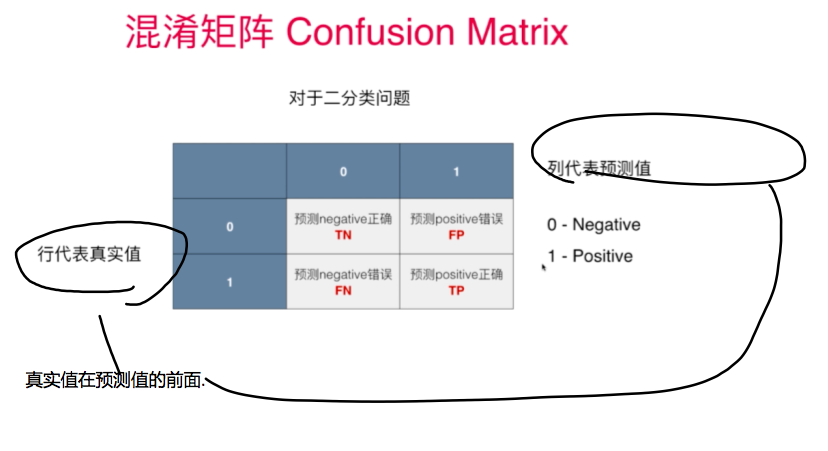

## 精确率
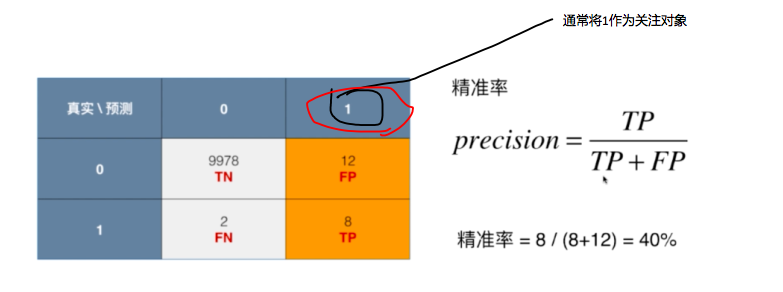

## 召回率
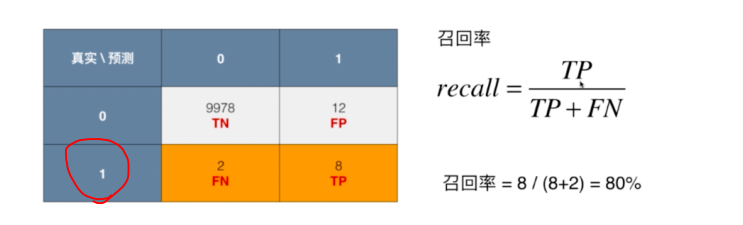

In [2]:
import numpy as np
from sklearn import datasets

In [9]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [12]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.97555555555555551

In [13]:
y_log_predict = log_reg.predict(X_test)

In [20]:
def TN(y_true,y_predict):
    assert len(y_true) ==len(y_predict)
    return np.sum((y_true == 0 ) & (y_predict == 0))

TN(y_test,y_log_predict)

403

In [21]:
def FP(y_true,y_predict):
    assert len(y_true) ==len(y_predict)
    return np.sum((y_true == 0 ) & (y_predict == 1))

FP(y_test,y_log_predict)


2

In [22]:
def FN(y_true,y_predict):
    assert len(y_true) ==len(y_predict)
    return np.sum((y_true == 1 ) & (y_predict == 0))

FN(y_test,y_log_predict)

9

In [23]:
def TP(y_true,y_predict):
    assert len(y_true) ==len(y_predict)
    return np.sum((y_true == 1 ) & (y_predict == 1))
TP(y_test,y_log_predict)

36

In [24]:
def confusion_matrix(y_true,y_predict):
    return np.array([
        [TN(y_true,y_predict),FP(y_true,y_predict)],
        [FN(y_true,y_predict),TP(y_true,y_predict)]
    ])

confusion_matrix(y_test,y_log_predict)

array([[403,   2],
       [  9,  36]])

In [25]:
def precision_score(y_true,y_predict):
    fp = FP(y_true,y_predict)
    tp = TP(y_true,y_predict)
    try:
        return tp/(fp+tp)
    except:
        return 0.0

In [26]:
precision_score(y_test,y_log_predict)

0.94736842105263153

In [27]:
def recall_score(y_true,y_predict):
    fn = FN(y_true,y_predict)
    tp = TP(y_true,y_predict)
    try:
        return tp/(fn+tp)
    except:
        return 0.0

In [28]:
recall_score(y_test,y_log_predict)

0.80000000000000004

### sklearn 中的混淆矩阵,精准率,召回率

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_log_predict)

array([[403,   2],
       [  9,  36]])

In [30]:
from sklearn.metrics import precision_score
precision_score(y_test,y_log_predict)

0.94736842105263153

In [31]:
from sklearn.metrics import recall_score
recall_score(y_test,y_log_predict)

0.80000000000000004